# Hashing y conjuntos

Un **hashing** es un método que convierte datos en una representación numérica (hash) utilizando una función matemática. Es ampliamente utilizado en estructuras de datos como tablas hash, criptografía y verificación de datos.
# ¿Qué es una función hash?
Una función hash es un algoritmo que transforma una entrada (dato de cualquier tamaño) en una salida de longitud fija, llamada hash o digest. Se usa en estructuras de datos, criptografía, verificación de integridad, y más.
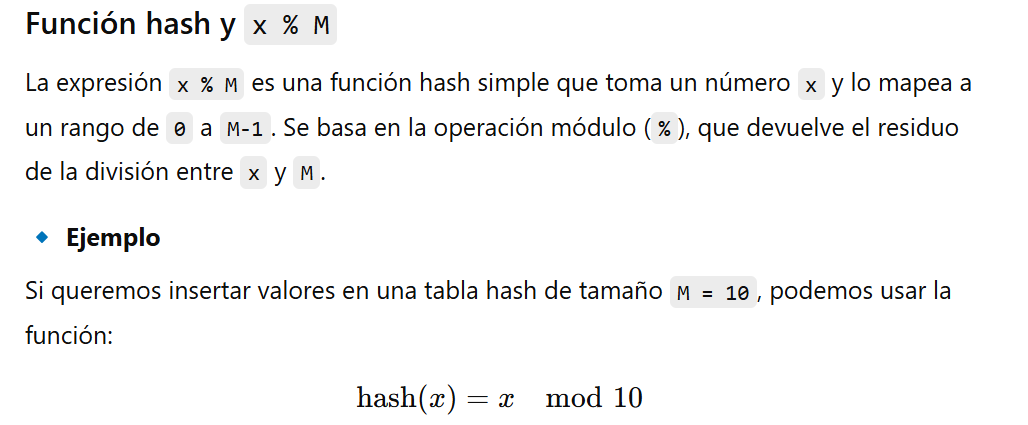
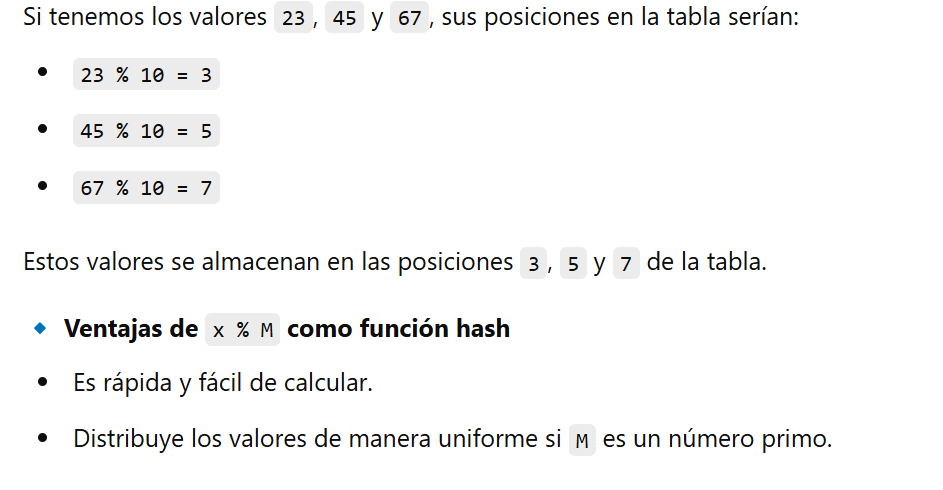
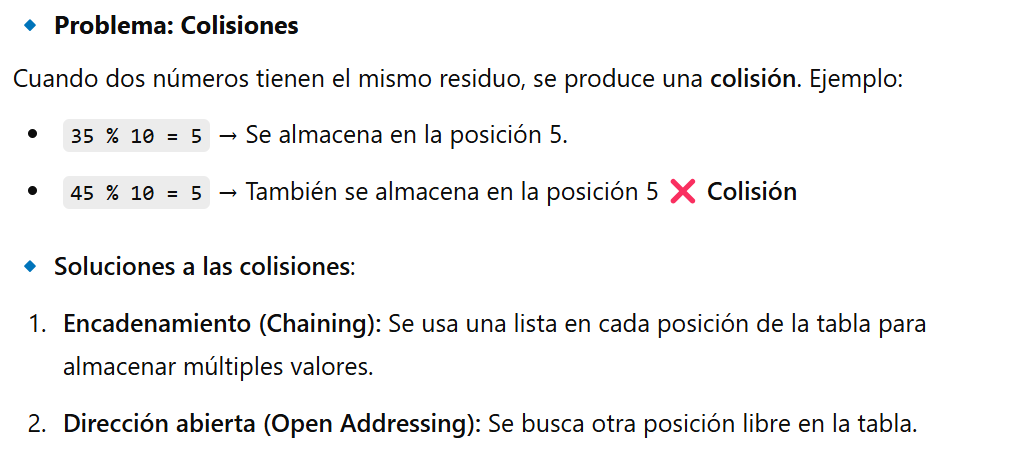


Para manejar las colisiones ( dos entradas diferentes con el mismo hash.)
se hace necesario algún mecanismo para manejarlos, siendo el más común el
encadenamiento, el cual consiste en:

• Almacenar, no un elemento en el arreglo, si no una lista enlazada
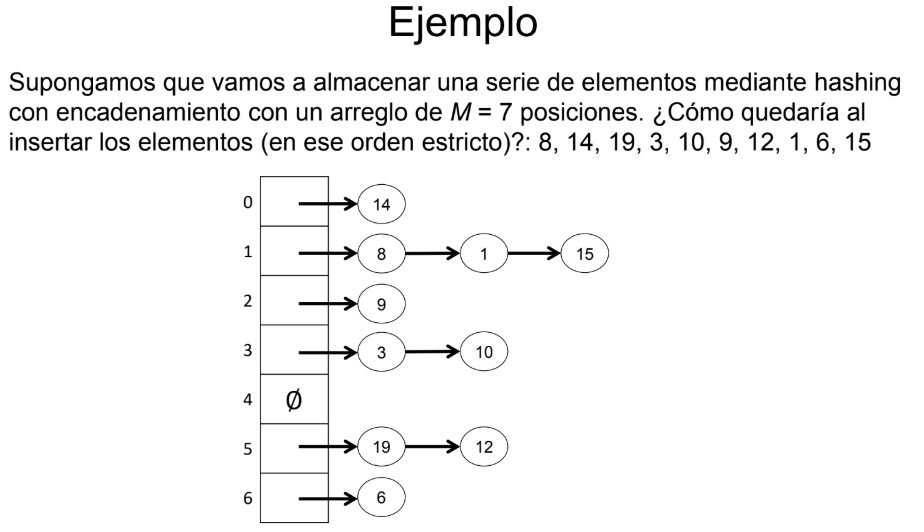

# Conjuntos
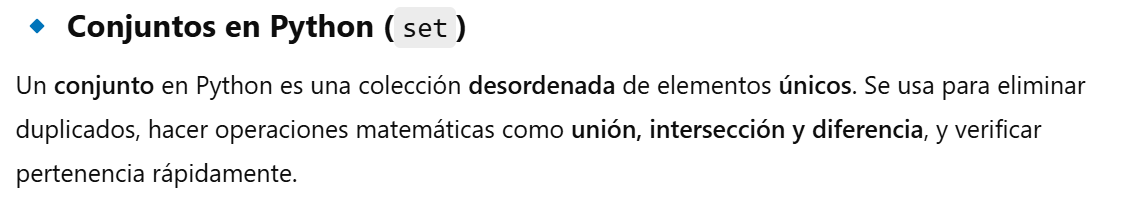

### ¿Por qué los conjuntos (set) son tan eficientes en Python?
Los conjuntos en Python son muy rápidos porque usan funciones hash para almacenar y buscar elementos. Esto les permite realizar operaciones como búsqueda, inserción y eliminación en tiempo O(1) en promedio, mucho más rápido que listas (O(n) en búsqueda).

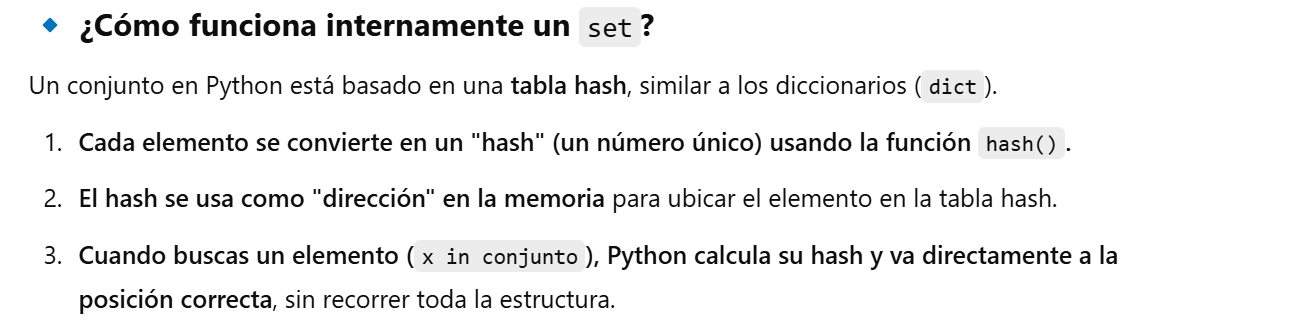
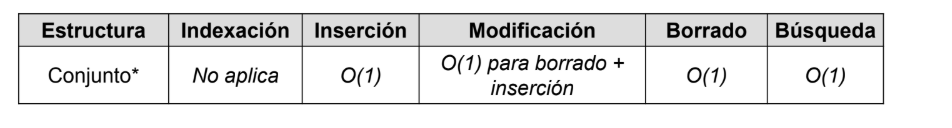

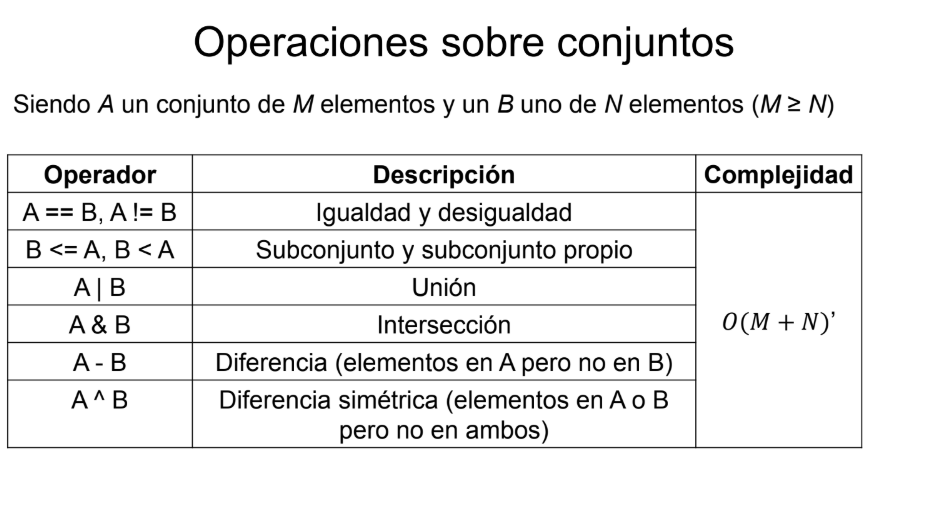

In [ ]:
# Conjunto con valores únicos
mi_conjunto = {1, 2, 3, 4, 4, 2}
print(mi_conjunto)  # {1, 2, 3, 4}

# Conjunto vacío
vacio = set()  # ⚠️ {} crea un diccionario, no un conjunto

# Operaciones

mi_conjunto.add(5)      # Agrega 5
mi_conjunto.remove(2)   # Elimina 2 (da error si no existe)
mi_conjunto.discard(10) # Elimina sin error si no existe
mi_conjunto.pop()       # Elimina un elemento aleatorio
print(mi_conjunto)

# verificar si un elemento está
print(3 in mi_conjunto)  # True
print(10 in mi_conjunto) # False

# Operaciones de conjuntos

A = {1, 2, 3, 4}
B = {3, 4, 5, 6}

print(A | B)  # Unión → {1, 2, 3, 4, 5, 6}
print(A & B)  # Intersección → {3, 4}
print(A - B)  # Diferencia (A sin B) → {1, 2}
print(A ^ B)  # Diferencia simétrica → {1, 2, 5, 6} (elementos en A o B, pero no en ambos)



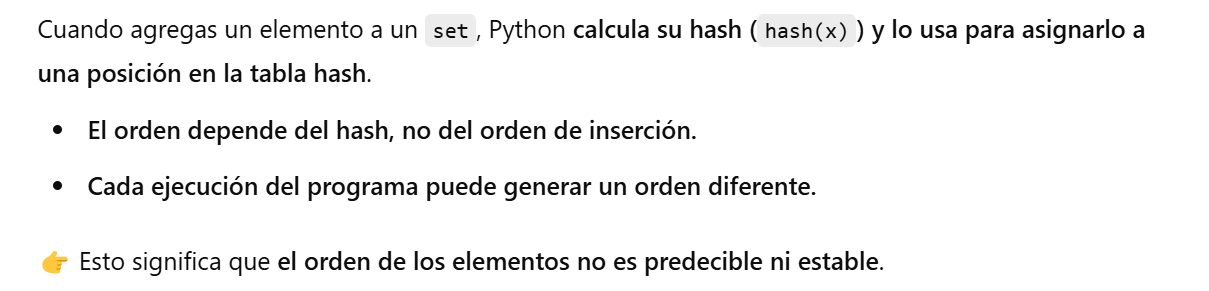

In [12]:
mi_set = {10, 2, 8, 1, 5}
print(mi_set)  # Salida: {1, 2, 5, 8, 10} (el orden puede cambiar)


{1, 2, 5, 8, 10}


In [13]:
valores = [20, 50, 30, 40, 50, 10]
a = set()
for v in valores:
    a.add(v)

a.remove(50)
print(a)

{40, 10, 20, 30}


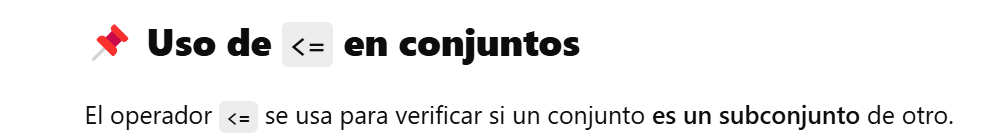

In [16]:
A = {1, 2, 3}
B = {1, 2, 3, 4, 5}

print(A <= B)  # True, porque A está completamente dentro de B


True


El operador >= se usa para verificar si un conjunto es un superconjunto de otro

In [17]:
A = {1, 2, 3, 4, 5}
B = {1, 2, 3}

print(A >= B)  # True, porque A contiene todos los elementos de B


True


## Ejercicio 1

In [2]:
def count_unique_pokemon():
    # Initialize sets for each trainer
    felipe_pokemon = set()
    vanesa_pokemon = set()
    
    while True:
        # Read input line
        line = input().strip()
        
        # Check if it's the end of input
        if line == '#':
            break
            
        # Split the line into trainer and pokemon ID
        trainer, pokemon_id = line.split()
        pokemon_id = int(pokemon_id)
        
        # Add pokemon to corresponding trainer's set
        if trainer == 'F':
            felipe_pokemon.add(pokemon_id)
        else:  # trainer == 'V'
            vanesa_pokemon.add(pokemon_id)
    
    # Calculate combined unique pokemon using union of both sets
    combined_pokemon = felipe_pokemon | vanesa_pokemon
    
    # Print results: Felipe's count, Vanesa's count, Combined count
    print(f"{len(felipe_pokemon)} {len(vanesa_pokemon)} {len(combined_pokemon)}")

# Run the function
count_unique_pokemon()

3 3 5


## Ejercicio 2

In [3]:
def count_konoha_population():
    # Dictionary to track state of each citizen
    # State will be: 0 = doesn't exist, 1 = alive/resurrected, 2 = dead
    citizens = {}
    population = 0

    while True:
        # Read input line
        line = input().strip()
        
        # Check if it's the end of input
        if line == "E":
            break
            
        # Split into action and ID
        action, id_num = line.split()
        id_num = int(id_num)
        
        # Get current state (0 if citizen doesn't exist yet)
        current_state = citizens.get(id_num, 0)
        
        # Process according to action type
        if action == "B":  # Birth
            if current_state == 0:  # Valid birth
                citizens[id_num] = 1  # Mark as alive
                population += 1
            # else: error case - ignore duplicate births or births of existing citizens
                
        elif action == "D":  # Death
            if current_state == 1:  # Valid death (citizen is alive)
                citizens[id_num] = 2  # Mark as dead
                population -= 1
            # else: error case - ignore death of non-existent or already dead citizen
                
        elif action == "R":  # Resurrection
            if current_state == 2:  # Valid resurrection (citizen is dead)
                citizens[id_num] = 1  # Mark as alive
                population += 1
            # else: error case - ignore resurrection of alive or non-existent citizen
    
    print(population)

# Run the function
count_konoha_population()

2


## Ejercicio 3

In [7]:
class Node:
    def __init__(self, student_id):
        self.id = student_id
        self.count = 1
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def height(self, node):
        return node.height if node else 0
    
    def balance_factor(self, node):
        return self.height(node.left) - self.height(node.right) if node else 0
    
    def update_height(self, node):
        if node:
            node.height = 1 + max(self.height(node.left), self.height(node.right))
    
    def rotate_right(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self.update_height(y)
        self.update_height(x)
        return x
    
    def rotate_left(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        self.update_height(x)
        self.update_height(y)
        return y
    
    def insert_or_update(self, root, student_id):
        if not root:
            return Node(student_id)
        
        if student_id < root.id:
            root.left = self.insert_or_update(root.left, student_id)
        elif student_id > root.id:
            root.right = self.insert_or_update(root.right, student_id)
        else:
            root.count += 1
            return root
        
        self.update_height(root)
        balance = self.balance_factor(root)
        
        # Left Left
        if balance > 1 and student_id < root.left.id:
            return self.rotate_right(root)
        
        # Right Right
        if balance < -1 and student_id > root.right.id:
            return self.rotate_left(root)
        
        # Left Right
        if balance > 1 and student_id > root.left.id:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)
        
        # Right Left
        if balance < -1 and student_id < root.right.id:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)
        
        return root

    def count_winners(self, root, target_count=5):
        def inorder(node):
            if not node:
                return 0
            winners = inorder(node.left)
            if node.count == target_count:
                winners += 1
            winners += inorder(node.right)
            return winners
        return inorder(root)

def solve():
    # Initialize AVL Tree
    avl = AVLTree()
    root = None
    
    # Process all 5 exercises
    for _ in range(5):
        n = int(input())
        for _ in range(n):
            student_id = int(input())
            root = avl.insert_or_update(root, student_id)
    
    # Count winners and calculate prize
    winners = avl.count_winners(root)
    if winners == 0:
        print("Nadie gana")
    else:
        print(1000000 // winners)


solve()

500000


## Ejercicio 4

In [ ]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def __init__(self):
        self.tree_set = set()

    def height(self, node):
        return node.height if node else 0
    
    def balance_factor(self, node):
        return self.height(node.left) - self.height(node.right) if node else 0
    
    def update_height(self, node):
        if node:
            node.height = 1 + max(self.height(node.left), self.height(node.right))
    
    def rotate_right(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self.update_height(y)
        self.update_height(x)
        return x
    
    def rotate_left(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        self.update_height(x)
        self.update_height(y)
        return y
    
    def insert(self, root, key):
        if key not in self.tree_set:
            self.tree_set.add(key)
            return self._insert(root, key)
        return root

    def _insert(self, root, key):
        # Standard BST insert
        if not root:
            return Node(key)
        
        if key < root.key:
            root.left = self._insert(root.left, key)
        elif key > root.key:
            root.right = self._insert(root.right, key)
        else:
            return root  # Duplicate keys not allowed
        
        # Update height and balance
        self.update_height(root)
        balance = self.balance_factor(root)
        
        # Left Left Case
        if balance > 1 and key < root.left.key:
            return self.rotate_right(root)
        
        # Right Right Case
        if balance < -1 and key > root.right.key:
            return self.rotate_left(root)
        
        # Left Right Case
        if balance > 1 and key > root.left.key:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)
        
        # Right Left Case
        if balance < -1 and key < root.right.key:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)
        
        return root

    def search(self, root, key):
        return key in self.tree_set

    def find_next_available(self, root, desired_key):
        while self.search(root, desired_key):
            desired_key += 1
        return desired_key

def solve():
    # Initialize AVL Tree
    avl = AVLTree()
    root = None
    
    # Read initial population
    F = int(input())
    for i in range(1, F + 1):
        root = avl.insert(root, i)
    
    # Process commands
    while True:
        command = input().strip()
        if command == "#":
            break
            
        parts = command.split()
        if parts[0] == "new":
            M = int(parts[1])
            N = int(parts[2])
            desired_name = M + N
            # Find next available name
            actual_name = avl.find_next_available(root, desired_name)
            root = avl.insert(root, actual_name)
        else:  # search
            num = int(parts[1])
            print("existe" if avl.search(root, num) else "no existe")


solve()

existe
no existe
existe


## Ejercicio 5

In [ ]:
def count_books_distribution():
    books = {}
    
    while True:
        line = input().strip()
        if line == "0":
            break
        
        parts = line.split()
        isbn = int(parts[0])
        owner = parts[1]
        
        # For each ISBN, store the owner(s) in a set.
        if isbn not in books:
            books[isbn] = set()
        books[isbn].add(owner)
    
    fernando_total = 0
    gustavo_total = 0
    
    # Determine the final distribution.
    for isbn, owners in books.items():
        if owners == {"F"}:              # Comprado solo por Fernando
            fernando_total += 1
        elif owners == {"G"}:            # Comprado solo por Gustavo
            gustavo_total += 1
        else:                           # Comprado por ambos
            if isbn % 2 == 0:           # ISBN par => a Fernando
                fernando_total += 1
            else:                       # ISBN impar => a Gustavo
                gustavo_total += 1
    
    print(f"{fernando_total} {gustavo_total}")

# Run the function
count_books_distribution()

2 3


## Ejercicio 6

In [ ]:
def count_voting_behavior():
    # Dictionary to track parties each citizen voted for.
    votes = {}
    
    while True:
        line = input().strip()
        if line == '#':
            break
        
        doc, party = line.split()
        doc = int(doc)
        
        if doc not in votes:
            votes[doc] = set()
        votes[doc].add(party)
    
    strict = 0   # citizens that voted always for just one party
    two_parties = 0  # voted for exactly two of them
    three_parties = 0  # voted for all three parties
    
    for parties in votes.values():
        if len(parties) == 1:
            strict += 1
        elif len(parties) == 2:
            two_parties += 1
        elif len(parties) == 3:
            three_parties += 1
    
    print(f"{strict} {two_parties} {three_parties}")

# Run the function
count_voting_behavior()